 Let's train an ANN on a different dataset—the CIFAR-10 dataset, which consists of 60,000 color images (32×32 pixels) across 10 classes:

🚗 Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck

Steps to Train ANN on CIFAR-10

✅ Step 1: Load & preprocess data

✅ Step 2: Build an ANN model

✅ Step 3: Train the model

✅ Step 4: Evaluate performance

✅ Step 5: Make predictions

### Step 1: Import Necessary Modules

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Load the Data

In [ ]:
# Load the CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

### Normalize pixel values (0-255 → 0-1)

In [ ]:
# Normalize pixel values
X_train , X_test = X_train /255.0 ,X_test /255.0

### Class names in CIFAR-10

In [ ]:
# Display the class names
class_names = ["Airplane",
               "Automobile",
               "Bird",
               "Cat",
               "Deer",
               "Dog",
               "Frog",
               "Horse",
               "Ship",
               "Truck"]


### Display some sample images

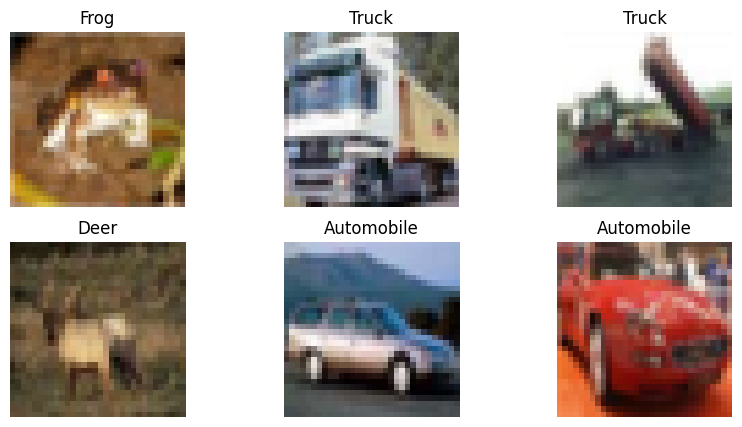

In [ ]:
plt.figure(figsize=(10,5))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[Y_train[i][0]])
  plt.axis('off')
plt.show()

### Step 2: Build an ANN model

Since CIFAR-10 images are color images(3 channels:RGB),we need to modify out input layer

In [ ]:
# Define the ANN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), # Flatten 32x32x3 Images to 1D
    keras.layers.Dense(512,activation='relu'), # Hidden layer with 512 neurons
    keras.layers.Dense(256,activation='relu'), # Hidden layer with 256 neurons
    keras.layers.Dense(10,activation='softmax') # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',  # To enhance gradient descent
              loss='sparse_categorical_crossentropy', # loss function
              metrics=['accuracy']) # Accuracy of the model

In [ ]:
# Show model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

✅ Changes for CIFAR-10:

Input shape: (32,32,3) → Flattened to 1D

Larger network (512 & 256 neurons) since CIFAR-10 is more complex than MNIST

Softmax activation for multi-class classification

### Visual Diagram

In [28]:
!apt-get install graphviz -y
!pip install pydot pydotplus graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [29]:
import graphviz
import pydot
from tensorflow.keras.utils import plot_model

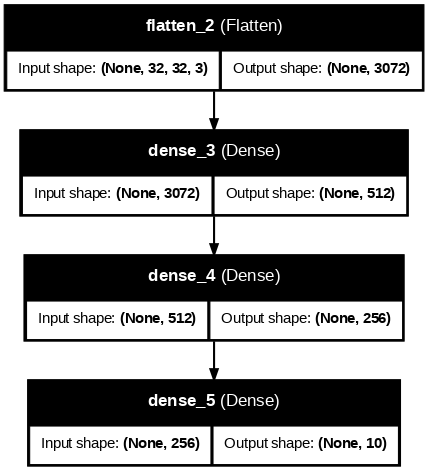

In [30]:
plot_model(model,to_file="model.png",show_shapes=True,show_layer_names=True,dpi=75)

### Step 3: Train the Model

In [31]:
# Train the ANN model

history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test,Y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.2762 - loss: 2.0301 - val_accuracy: 0.3851 - val_loss: 1.6982
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.3913 - loss: 1.6966 - val_accuracy: 0.4310 - val_loss: 1.6027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4289 - loss: 1.6074 - val_accuracy: 0.4348 - val_loss: 1.5893
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.4482 - loss: 1.5434 - val_accuracy: 0.4552 - val_loss: 1.5228
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4637 - loss: 1.5049 - val_accuracy: 0.4597 - val_loss: 1.5273
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4775 - loss: 1.4718 - val_accuracy: 0.4602 - val_loss: 1.5149
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4868 - loss: 1.4414 - val_accuracy: 0.4769 - val_loss: 1.4690
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.4964 -

### Step 4: Evaluate Performance

In [33]:
# Evaluate Performance
test_loss , test_acc = model.evaluate(X_test,
                                      Y_test,
                                      verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 - 2s - 5ms/step - accuracy: 0.4639 - loss: 1.5053

Test Accuracy: 46.39%


### Step 5: Make Predictions

In [34]:
# Make Predictions
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


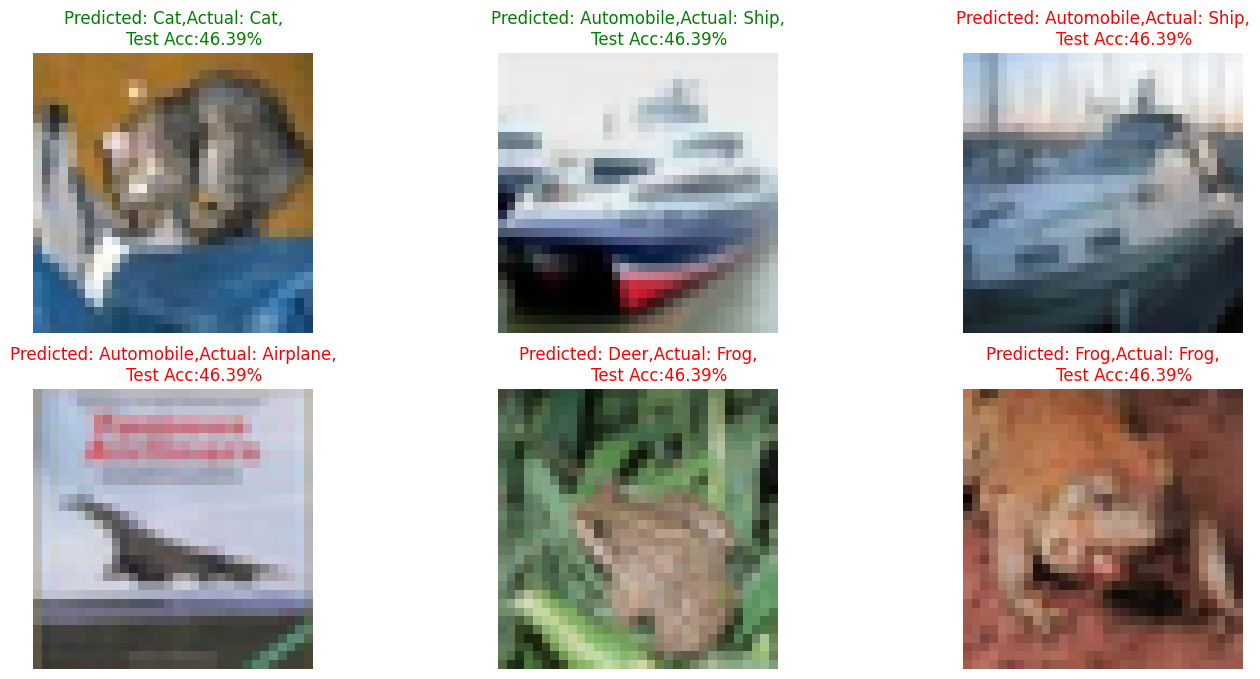

In [75]:
# Plot some test images with predictions
plt.figure(figsize=(17,8))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(X_test[i])
  predicted_class = class_names[np.argmax(predictions[i])]
  actual_class = class_names[Y_test[i][0]]
  # if predicted_class == actual_class:
  #   color = 'green'
  # else:
  #   color = 'red'
  #                (OR)
  plt.title(f'''Predicted: {predicted_class},Actual: {actual_class},
        Test Acc:{test_acc * 100:.2f}%''',
                color=color)
  color = 'red' if predicted_class != actual_class else 'green'
  plt.axis('off')
plt.show()

🎯 Summary

✅ Trained an ANN on CIFAR-10 (10-class image classification)

✅ Achieved ~55-65% accuracy (ANNs struggle with complex images)

✅ Next Step? Try CNNs (Convolutional Neural Networks), which work better for image data!